## 1. Introduction
**Ensemble learning** là kỹ thuật học máy khi nhiều mô hình được huấn luyện giải quyết cùng một bài toán và tổng hợp lại để có kết quả tốt hơn. Nguyên tắc cơ bản của Ensemble là tổng hợp một nhóm week learners và tạo thành một strong learner, outperform model đơn lẻ.
- Bagging (Boostrap Aggregating): Tạo nhiều training dataset bằng random sampling with replacement. Dùng 1 model dể train nhiều dataset (random forest), sau đó kết hợp các kết quả predictions của nhiều predictors lại để thu được kết quả cuối cùng (catecorical type thì thường lấy mode, numerical type thì lấy mean). Kết quả thu được thường có similar bias nhưng lower variance.
- Pasting: khác Bagging ở đoạn training data set được tạo bằng random sampling without replacement
- Boosting: Huấn luyện predictor sequentially, model sau sẽ tập trung vào lỗi sai của model trước. (Adaboost, Gradient Boosting)
- Stacking: Huấn luyện nhiều layer predictors, và huấn luyện 1 layer cuối gọi là blender để vote kết quả cuối cùng (thay vì hard code mode, mean như bagging)



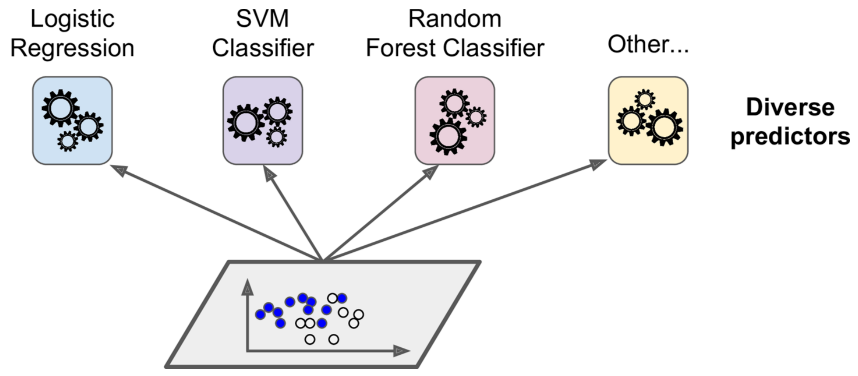
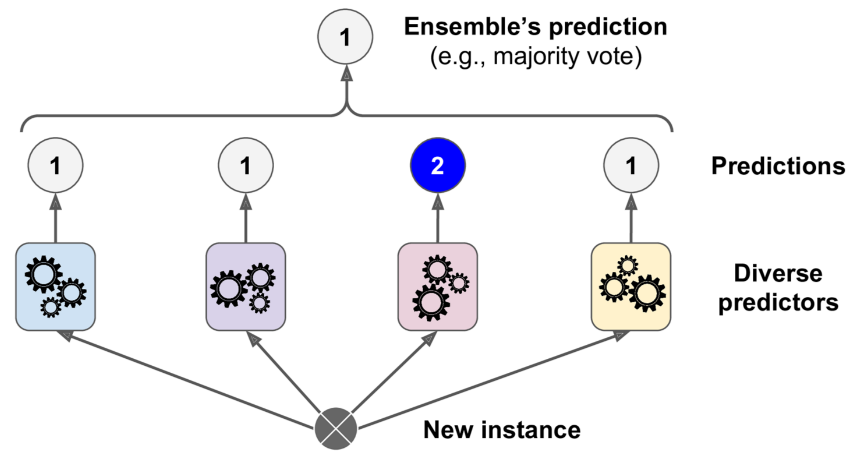

## 2. Random forest
Là thuật toán học máy có giám sát, là một enseble của Decision Tree, thường được huấn luyện sử dụng phương pháp Bagging. 
- Diversity: Các cây được tạo nên diverse bằng cách sử dụng các tập hợp features khác nhau và độc lập lẫn nhau. 
- Acceptability: tất cả cây nên có kết quả chấp nhận được. 
- Giảm thiểu vấn đề về đa chiều dữ liệu vì không sử dụng tất cả các features trong một lần xây dựng cây
- Song song: các cây phát triển độc lập vì vậy có thể chạy song song, tối ưu CPU
- Train-test split; không cần chia tập test/train vì luôn có 30% dữ liệu mà decision tree chưa học
- Stability: mô hình ổn định hơn do sự ngẫu nhiên khi chọn feature, giảm thiểu overfitting, hơn nữa là tập hợp nhiều cây nên theo luật số lớn, kết quả thu được gần với kết quả thực sự.


## 3. Pseudo Code
Cho tập training set $X = x_1, x_2,  ...x_n$ với biến phản hồi $Y = y_1, y_2, ...y_n. 
1. Sample with replacement B time to create B training dataset
2. Traing a predictor with each dataset
3. Aggregating results from B predictors to get final results
- Regression problems: $f = \frac{1}{B}\sum_{b=1}^{B}f_b(x')$ 
- Classification problems: $f = mode(Y)$ where $Y = {f_b(x')}$

## 4. Implementation

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.metrics import accuracy_score


In [5]:
class RandomForest():
    def __init__(self, 
                n_estimators = 100,
                criterion = 'gini',
                max_depth = None,
                min_samples_leaf = 1,
                max_features = 'sqrt',
                min_impurity_decrease = 0.0,
                random_state = 0):
        """Parameters:
        n_estimators (int): The number of trees in the forest, default 100
        criterion (str): The function to measure the quality of a split, default gini
        max_depth (int): The maximum depth of the tree, default None
        max_features (int): The number of features to consider when looking for best split
        min_impurity_decrease (float): min decrease of impurity a split must have in order to be executed
        random_state (int): controls randomness of samples
        """
        self.n_estimators = n_estimators
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.random_state = random_state
        self.min_impurity_decrease = min_impurity_decrease 
    def fit(self, X, y):
        #get the number of sample and features in data
        self.n_samples, self.n_features = X.shape
        if self.max_features=='sqrt':
            self.max_features = int(np.sqrt(self.n_features))
        self.tree_lst = []
        for i in range(self.n_estimators):
            X_train, _, y_train, _= train_test_split(X, y, test_size=0.3, random_state=self.random_state+1)
            tree = DecisionTreeClassifier(
                criterion=self.criterion, 
                max_depth=self.max_depth, 
                max_features=self.max_features,
                min_samples_leaf=self.min_samples_leaf,
                min_impurity_decrease=self.min_impurity_decrease,
                random_state=self.random_state)
            tree.fit(X_train, y_train)
            self.tree_lst.append(tree)
    def predict(self, X_test):
        predict_arr = []
        for tree in self.tree_lst:
            predict = tree.predict(X_test)
            predict_arr.append(predict)
        #get the labels that most trees predict
        predict_label = np.squeeze(stats.mode(predict_arr, axis=0)[0])
        return predict_label


In [6]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
df = datasets.load_iris()
X = df.data[:, 2:]
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForest()
model.fit(X = X_train, y = y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

## 5. Thư viện sklearn

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

Thư viện sklearn cung cấp API sẵn cho Bagging và Pasting với lớp BaggingClassifier
- n_estimators: số cây decision tree tạo
- max_samples: số lượng sample max sử dụng để train 1 cây
- bootstrap = True: sample with replacement

In [10]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, bootstrap=True, n_jobs=-1,
                            oob_score=True)
bag_clf.fit(X_train, y_train)
y_pred_sk = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred_sk)

1.0

Với bagging, chỉ tầm 63% training data được sử dụng. Vì vậy có khoảng 37% dữ liệu 1 predictor chưa bao giờ thấy. Chúng ta có thể sử dụng dữ liệu này để validate model mà không cần phải tách riêng tập validation. Chỉ số này là oob_score.

In [11]:
bag_clf.oob_score_

0.9428571428571428

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16)
rnd_clf.fit(X_train, y_train)
y_pred_rn = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred_rn)

1.0

**Feature Importance** 
Sklearn cung cấp cách đo đạc độ quan trọng của từng feature trong mô hình

In [16]:
rnd_clf2 = RandomForestClassifier(n_estimators=100)
rnd_clf2.fit(df['data'], df['target'])
for name, score in zip(df['feature_names'], rnd_clf2.feature_importances_):
    print(name, score)

sepal length (cm) 0.09823703906494871
sepal width (cm) 0.0266775689956173
petal length (cm) 0.3876487085560322
petal width (cm) 0.48743668338340185
